In [33]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [34]:
PATH = "/content"

In [35]:
# Importing the dataset

def loading_data(path=PATH):
  csv_path = os.path.join(PATH, "Realestate.csv")
  return pd.read_csv(csv_path)

In [36]:
df_estate = loading_data()
df_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [37]:
df_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [38]:
df_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [39]:
## We want to rename the columns

df_estate = df_estate.rename(columns = {"X1 transaction date":"transaction_date",
                                        "X2 house age":"house_age",
                                        "X3 distance to the nearest MRT station":"nearest_MRT_station",
                                        "X4 number of convenience stores":"num_conv_stores",
                                        "X5 latitude":"latitude",
                                        "X6 longitude":"longitude",
                                        "Y house price of unit area":"price_unit_area"})
df_estate

,No,transaction_date,house_age,nearest_MRT_station,num_conv_stores,latitude,longitude,price_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [40]:
df_estate = df_estate.drop(['No'], axis=1)
df_estate.head()

,transaction_date,house_age,nearest_MRT_station,num_conv_stores,latitude,longitude,price_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [41]:
df_estate.dtypes

transaction_date       float64
house_age              float64
nearest_MRT_station    float64
num_conv_stores          int64
latitude               float64
longitude              float64
price_unit_area        float64
dtype: object

# Data Cleaning

In [42]:
## Extracting useful info from "transaction_date" column. Like Year, Quarter.
## Transaction date column has two parts Year, MonthCode
## Each month equals to 83.33 units additional to the previous month
## Eg-> 2013.250 means -> Year is 2013 and month is 250/83.33 (3rd)

## getting [year, month_code] list
year_month = df_estate['transaction_date'].apply(lambda x:str(x).split("."))

years = [int(year[0]) for year in year_month] 
months = [int(year[1]) for year in year_month]

df_estate['transaction_year'] = years
df_estate['transaction_month'] = months


In [43]:
## some valules in months list eg:- 500 fot auto formatted to 5.
## we need to adjust them
df_estate['transaction_month'] = df_estate['transaction_month'].apply(lambda x:x*100 if x<10 else x)
df_estate['transaction_month'] = df_estate['transaction_month'].apply(lambda x:x*10 if x<100 else x)

In [44]:
## Lets make this month code usefull by converting it into quarter
## Eg:- (250->March->Q1, 500->June->Q2..)
def quarter_converter(month):
  if month <= 250: return "Q1"
  elif month <= 500: return "Q2"
  elif month <= 750: return "Q3"
  elif month <= 1000: return "Q4"

In [45]:
df_estate['transaction_qtr'] = df_estate['transaction_month'].apply(quarter_converter)

In [46]:
df_estate.head()

,transaction_date,house_age,nearest_MRT_station,num_conv_stores,latitude,longitude,price_unit_area,transaction_year,transaction_month,transaction_qtr
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,917,Q4
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,917,Q4
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,583,Q3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,500,Q2
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,833,Q4


In [47]:
df_estate.describe()

,transaction_date,house_age,nearest_MRT_station,num_conv_stores,latitude,longitude,price_unit_area,transaction_year,transaction_month
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652,536.318841
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687,270.287426
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000,0.000000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000,333.000000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000,500.000000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000,830.000000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000,917.000000


In [48]:
df_estate['transaction_month']

0      917
1      917
2      583
3      500
4      833
      ... 
409      0
410    667
411    250
412      0
413    500
Name: transaction_month, Length: 414, dtype: int64

In [49]:
df_estate['transaction_year']

0      2012
1      2012
2      2013
3      2013
4      2012
       ... 
409    2013
410    2012
411    2013
412    2013
413    2013
Name: transaction_year, Length: 414, dtype: int64

In [50]:
df_estate = df_estate.drop(['transaction_date', 'transaction_month'], axis=1)

In [51]:
df_estate

,house_age,nearest_MRT_station,num_conv_stores,latitude,longitude,price_unit_area,transaction_year,transaction_qtr
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,Q4
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,Q4
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,Q3
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,Q2
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,Q4
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,Q1
410,5.6,90.45606,9,24.97433,121.54310,50.0,2012,Q3
411,18.8,390.96960,7,24.97923,121.53986,40.6,2013,Q1
412,8.1,104.81010,5,24.96674,121.54067,52.5,2013,Q1


In [52]:
df_estate.dtypes

house_age              float64
nearest_MRT_station    float64
num_conv_stores          int64
latitude               float64
longitude              float64
price_unit_area        float64
transaction_year         int64
transaction_qtr         object
dtype: object

In [53]:
## The transaction_qtr is in `object` type. Ml model only accepts int or float.

df_estate = pd.get_dummies(df_estate, drop_first=True)
df_estate.head()

,house_age,nearest_MRT_station,num_conv_stores,latitude,longitude,price_unit_area,transaction_year,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,0,0,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,0,0,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,0,1,0
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,1,0,0
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,0,0,1


# EDA

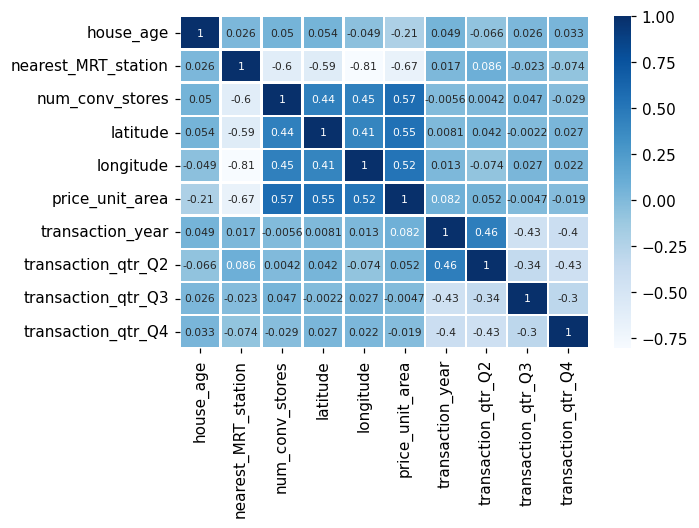

In [55]:
plt.figure(dpi=110)
sns.heatmap(df_estate.corr(), linewidths=1, cmap="Blues", annot=True, annot_kws={'size':7})

In [56]:
abs(df_estate.corr()['price_unit_area']).sort_values()[::-1][:5]

price_unit_area        1.000000
nearest_MRT_station    0.673613
num_conv_stores        0.571005
latitude               0.546307
longitude              0.523287
Name: price_unit_area, dtype: float64

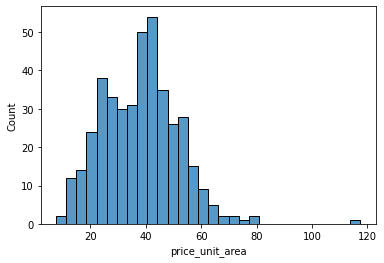

In [57]:
sns.histplot(df_estate['price_unit_area'], bins=30)

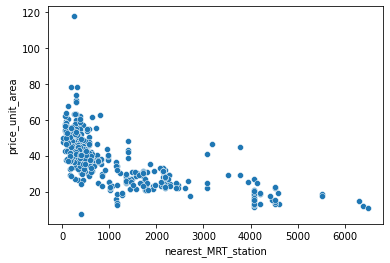

In [59]:
sns.scatterplot(data=df_estate, x='nearest_MRT_station', y='price_unit_area')

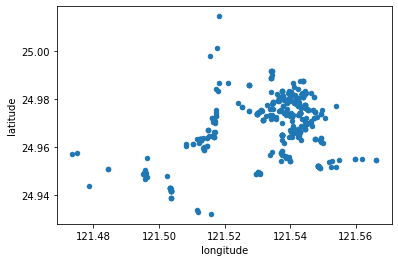

In [61]:
df_estate.plot(kind="scatter", x="longitude", y="latitude")

No handles with labels found to put in legend.


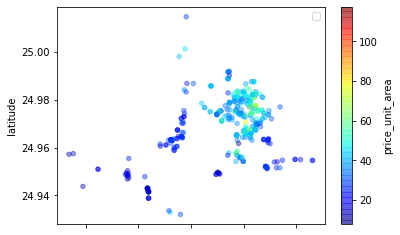

In [62]:
df_estate.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
c="price_unit_area", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

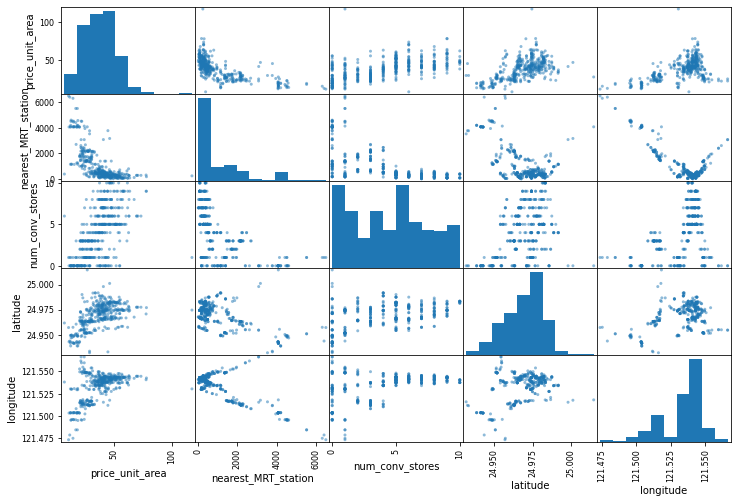

In [64]:
from pandas.plotting import scatter_matrix
attributes = ['price_unit_area', 'nearest_MRT_station', 'num_conv_stores', 'latitude', 'longitude']
scatter_matrix(df_estate[attributes], figsize=(12, 8));

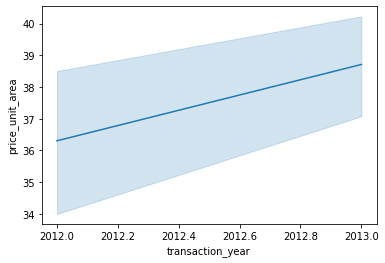

In [65]:
sns.lineplot(x=df_estate['transaction_year'], y=df_estate['price_unit_area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


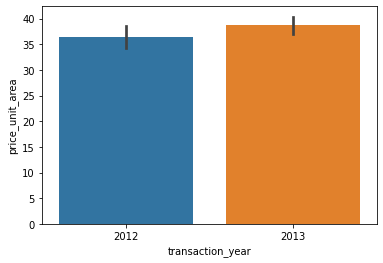

In [67]:
sns.barplot(df_estate['transaction_year'], df_estate['price_unit_area']);

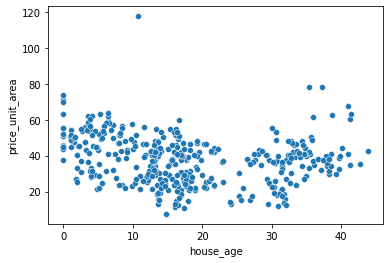

In [68]:
sns.scatterplot(data=df_estate, x='house_age', y='price_unit_area')

In [71]:
df_estate[(df_estate['price_unit_area'] > 100) & (df_estate['house_age'] < 20)]

,house_age,nearest_MRT_station,num_conv_stores,latitude,longitude,price_unit_area,transaction_year,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4


In [70]:
df_estate = df_estate.drop(270)

In [72]:
df_estate

,house_age,nearest_MRT_station,num_conv_stores,latitude,longitude,price_unit_area,transaction_year,transaction_qtr_Q2,transaction_qtr_Q3,transaction_qtr_Q4
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,0,0,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,0,0,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,0,1,0
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,1,0,0
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,0,0,1
...,...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,0,0,0
410,5.6,90.45606,9,24.97433,121.54310,50.0,2012,0,1,0
411,18.8,390.96960,7,24.97923,121.53986,40.6,2013,0,0,0
412,8.1,104.81010,5,24.96674,121.54067,52.5,2013,0,0,0


In [73]:
## Lets split the data

X = df_estate.drop('price_unit_area', axis=1)
y = df_estate['price_unit_area']

In [76]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly_feat = PolynomialFeatures(degree=2)
X_poly = poly_feat.fit_transform(X)
X_poly.shape

(413, 55)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((309, 55), (104, 55))

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[0]

array([ 0.00000000e+00, -6.46403759e-03,  4.23421325e+00, -1.03595214e+00,
       -9.63312934e-01, -3.85021765e+00,  6.41060765e-01, -7.17430054e-01,
        2.05846742e+00, -5.96039561e-01, -2.82597343e-01,  3.28388394e+00,
       -6.39080890e-01, -7.22911091e-03, -7.20768336e-03, -6.25871232e-03,
       -5.68485992e-01,  1.55753554e+00, -4.67769182e-01,  6.65191155e+00,
        2.05449956e+00,  4.23527005e+00,  4.23298432e+00,  4.23493256e+00,
       -4.27602013e-01,  8.47861776e+00, -3.70810126e-01, -9.08970569e-01,
       -1.03606116e+00, -1.03609018e+00, -1.03590993e+00, -5.34558295e-01,
        8.80850871e-02, -4.52567223e-01, -9.63413586e-01, -1.71343006e+00,
       -6.18788094e-01, -7.17429883e-01,  2.05729663e+00, -5.96039483e-01,
       -3.84961110e+00, -1.31141743e+00, -7.17430044e-01,  2.05722763e+00,
       -5.96039555e-01,  6.41060765e-01, -7.17430054e-01,  2.05936742e+00,
       -5.96039537e-01, -7.17430054e-01,  0.00000000e+00,  0.00000000e+00,
        2.05846742e+00,  

# Training Models

In [81]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# Linear Regression

In [82]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

In [102]:
LR_P_DF = pd.DataFrame()

In [107]:
LR_P_DF["Predictions"] = linear_y_pred
LR_P_DF["Truth labels"] = y_test
LR_P_DF

,Predictions,Truth labels
0,36.330221,37.9
1,37.735495,NaN
2,23.463034,NaN
3,27.275534,54.8
4,50.385885,NaN
...,...,...
99,37.917135,NaN
100,47.459128,NaN
101,45.882956,NaN
102,40.415182,NaN


In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [113]:
linear_mae = mean_absolute_error(y_test, linear_y_pred)
print(linear_mae)

linear_rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
print(linear_rmse)

linear_r2 = r2_score(y_test, linear_y_pred)
print(linear_r2)

5.370314998681999
7.583709104830872
0.61280371465572


# Ridge Regression with Cross Validation

In [114]:
Ridge_model = RidgeCV(alphas = [0.1, 1, 10])
Ridge_model.fit(X_train, y_train)
ridge_y_pred = Ridge_model.predict(X_test)

In [116]:
Ridge_model.alpha_

10.0

In [117]:
RCV_P_DF = pd.DataFrame()

In [118]:
RCV_P_DF["Predictions"] = ridge_y_pred
RCV_P_DF["Truth labels"] = y_test
RCV_P_DF

,Predictions,Truth labels
0,36.852068,37.9
1,39.237782,NaN
2,29.647880,NaN
3,29.663546,54.8
4,51.169063,NaN
...,...,...
99,38.027162,NaN
100,37.129761,NaN
101,44.688571,NaN
102,41.789679,NaN


In [119]:
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
print(ridge_mae)

ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_y_pred))          
print(ridge_rmse)

ridge_r2 = r2_score(y_test,ridge_y_pred)
print(ridge_r2 )

5.1698140581557235
7.5324925523891455
0.6180159122131532


# Lasso Regression with Cross Validation

In [121]:
Lasso_model = LassoCV(eps=0.01, n_alphas=1000, max_iter=1000)
Lasso_model.fit(X_train, y_train)
lasso_y_pred = Lasso_model.predict(X_test)

In [122]:
Lasso_model.alpha_

0.09508708437510645

In [123]:
Lasso_model.coef_

array([ 0.00000000e+00, -2.95107077e+00, -6.86497119e+00,  2.81437432e+00,
        1.02995114e-01, -0.00000000e+00,  0.00000000e+00,  1.00686645e+00,
       -0.00000000e+00,  6.10034789e-03,  6.15597525e+00,  3.68649226e-01,
       -0.00000000e+00, -5.90459405e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.62843416e-01, -8.37597430e-01,  2.82866672e+00,
       -2.72806943e+00, -3.73897355e-01, -0.00000000e+00, -0.00000000e+00,
        1.79634048e-02, -2.45036799e-03,  0.00000000e+00, -3.35017605e-01,
        1.67619551e+00,  5.10180338e-02,  1.95013221e-02, -0.00000000e+00,
        6.77296194e-01,  2.60175558e-03,  6.38875369e-01,  0.00000000e+00,
        2.62435885e+00,  0.00000000e+00, -0.00000000e+00,  1.28213433e+00,
       -5.90427236e-01, -0.00000000e+00,  1.50188745e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.79957850e-03, -0.00000000e+00,
        0.00000000e+00,  1.14974553e-17,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [124]:
Lasso_P_DF = pd.DataFrame()
Lasso_P_DF["Predictions"] = lasso_y_pred
Lasso_P_DF["Truth labels"] = y_test
Lasso_P_DF

,Predictions,Truth labels
0,36.564784,37.9
1,39.208375,NaN
2,29.160604,NaN
3,29.723724,54.8
4,51.444733,NaN
...,...,...
99,37.643952,NaN
100,38.303779,NaN
101,44.406673,NaN
102,42.196692,NaN


In [125]:
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
print(lasso_mae)

lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_y_pred))          
print(lasso_rmse)

lasso_r2 = r2_score(y_test,lasso_y_pred)
print(lasso_r2 )

5.2864839298051525
7.472193365355235
0.62410715929204


# Elastic Net with Cross Validation

In [126]:
Elasticnet_model = ElasticNetCV(l1_ratio=[0.1, 0.2, 0.5, 0.8, 0.9, 0.99, 1], eps=0.01, n_alphas=1000, max_iter=1000)
Elasticnet_model.fit(X_train, y_train)
elasticnet_y_pred = Elasticnet_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.331e+01, tolerance: 5.460e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [127]:
Elasticnet_model.l1_ratio_

0.99

In [128]:
elasticnet_mae = mean_absolute_error(y_test,elasticnet_y_pred)
print(elasticnet_mae)

elasticnet_rmse = np.sqrt(mean_squared_error(y_test,elasticnet_y_pred))          
print(elasticnet_rmse)

elasticnet_r2 = r2_score(y_test,elasticnet_y_pred)
print(elasticnet_r2)

5.288973333984525
7.47869560448969
0.6234526771455502


In [129]:
Elastic_P_DF = pd.DataFrame()
Elastic_P_DF["Predictions"] = elasticnet_y_pred
Elastic_P_DF["Truth labels"] = y_test
Elastic_P_DF

,Predictions,Truth labels
0,36.605837,37.9
1,39.225131,NaN
2,29.136858,NaN
3,29.741176,54.8
4,51.477332,NaN
...,...,...
99,37.669784,NaN
100,38.332696,NaN
101,44.428094,NaN
102,42.186601,NaN


# Support Vector Machine

In [130]:
from sklearn.svm import SVR

In [131]:
SVR_model = SVR(kernel='linear')
SVR_model.fit(X_train, y_train)
svr_y_pred = SVR_model.predict(X_test)

In [132]:
SVR_P_DF = pd.DataFrame()
SVR_P_DF["Predictions"] = svr_y_pred
SVR_P_DF["Truth labels"] = y_test
SVR_P_DF

,Predictions,Truth labels
0,37.540608,37.9
1,38.678451,NaN
2,29.590292,NaN
3,27.764283,54.8
4,50.030374,NaN
...,...,...
99,37.875536,NaN
100,36.332080,NaN
101,44.137270,NaN
102,40.724007,NaN


In [133]:
svr_mae = mean_absolute_error(y_test, svr_y_pred)
print(svr_mae)

svr_rmse = np.sqrt(mean_squared_error(y_test, svr_y_pred))
print(svr_rmse)

svr_r2 = r2_score(y_test,svr_y_pred)
print(svr_r2)

5.1695294942695105
7.666280877515475
0.6043261908731228


In [134]:
errors_df = pd.DataFrame(data=[[linear_mae,ridge_mae,lasso_mae, elasticnet_mae,svr_mae],
                               [linear_rmse,ridge_rmse,lasso_rmse, elasticnet_rmse,svr_rmse],
                               [linear_r2,ridge_r2,lasso_r2, elasticnet_r2,svr_r2]], 
                         columns=["Linear", "Ridge", "Lasso", "Elastic Net", "SVR"],
                         index=["MAE","RMSE","R2"]
                        )
errors_df

,Linear,Ridge,Lasso,Elastic Net,SVR
MAE,5.370315,5.169814,5.286484,5.288973,5.169529
RMSE,7.583709,7.532493,7.472193,7.478696,7.666281
R2,0.612804,0.618016,0.624107,0.623453,0.604326


We can see `SVR` is performing way better. So `SVR` is our Final Model.

DO keep it mind that data was not very accurate as can be seen throughout the EDA processes